In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg 
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from pmdarima import auto_arima

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel('PJMW_MW_Hourly.xlsx', index_col=0)
df

,PJMW_MW
Datetime,
2002-12-31 01:00:00,5077
2002-12-31 02:00:00,4939
2002-12-31 03:00:00,4885
2002-12-31 04:00:00,4857
2002-12-31 05:00:00,4930
...,...
2018-01-01 20:00:00,8401
2018-01-01 21:00:00,8373
2018-01-01 22:00:00,8238


In [3]:
from statsmodels.tsa.stattools import adfuller

df_test= adfuller(df['PJMW_MW'], autolag='AIC')

print('1. ADF:', df_test[0])
print('2. P-Value:', df_test[1])
print('3. Number of lags:', df_test[2])
print('4. Num of observations used for ADF Regression and Critical Value Calculation:', df_test[3])
print('5. Critical Values:')
for key, val in df_test[4].items():
    print('\t', key, ":", val)

1. ADF: -19.53097878897811
2. P-Value: 0.0
3. Number of lags: 74
4. Num of observations used for ADF Regression and Critical Value Calculation: 143131
5. Critical Values:
	 1% : -3.4303956883364264
	 5% : -2.8615601935959596
	 10% : -2.5667807483328238


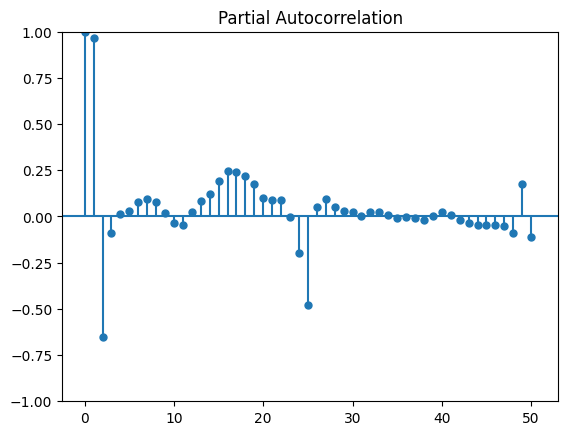

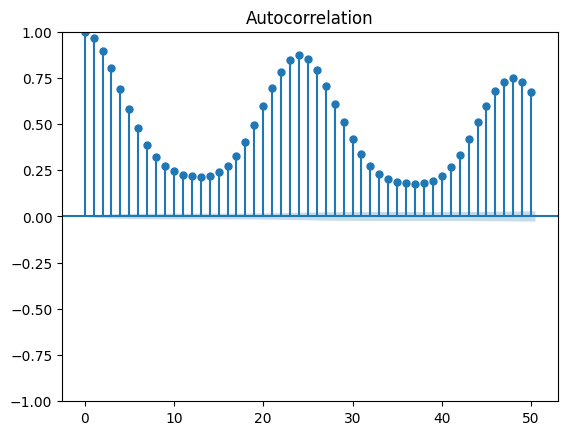

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

pacf= plot_pacf(df['PJMW_MW'], lags= 50)
acf=plot_acf(df['PJMW_MW'], lags= 50)

In [5]:
train = df.loc[df.index < '01-01-2018']
test = df.loc[df.index >= '01-01-2018']

In [7]:
order = auto_arima(df['PJMW_MW'])
order

ARIMA(order=(5, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [8]:
model = ARIMA(train['PJMW_MW'], order=(5, 1, 3)).fit()

In [9]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                PJMW_MW   No. Observations:               138070
Model:                 ARIMA(5, 1, 3)   Log Likelihood             -908294.636
Date:                Tue, 04 Apr 2023   AIC                        1816607.271
Time:                        00:34:42   BIC                        1816695.791
Sample:                             0   HQIC                       1816633.751
                             - 138070                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3579      0.003    426.979      0.000       1.352       1.364
ar.L2          0.5247      0.006     83.283      0.000       0.512       0.537
ar.L3         -1.3863      0.005   -266.814      0.0

In [10]:
model.params

ar.L1         1.357864
ar.L2         0.524713
ar.L3        -1.386286
ar.L4         0.415153
ar.L5         0.026951
ma.L1        -0.923020
ma.L2        -0.952872
ma.L3         0.909386
sigma2    30530.536451
dtype: float64

In [11]:
pred = model.predict(start=len(train), end=(len(train)+len(test)-1), dynamic=False)
pred

138070    4844.007046
138071    4753.212615
138072    4696.592026
138073    4690.783801
138074    4697.759644
             ...     
143201    4982.347087
143202    4982.347087
143203    4982.347087
143204    4982.347087
143205    4982.347087
Name: predicted_mean, Length: 5136, dtype: float64

In [12]:
model = ARIMA(train['PJMW_MW'], order=(5, 1, 3)).fit()
pred = model.predict(start=len(train), end=(len(train)+len(test)-1), dynamic=False)
print(np.sqrt(mean_squared_error(test['PJMW_MW'], pred)))

1334.3087196658025


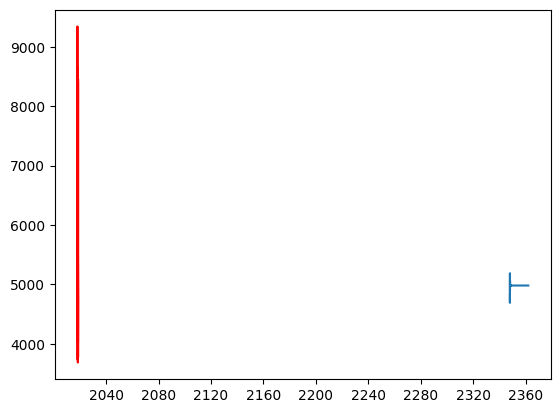

In [13]:
plt.plot(pred)
plt.plot(test, color='red')

In [15]:
pred_Future= model.predict(start= len(df)+1, end= len(df)+10, dynamic= False)
print('Then future prediction for the next 30 days')
print(pred_Future)
print('Number of predictions made: \t', len(pred_Future))

Then future prediction for the next 30 days
143207    4982.347087
143208    4982.347087
143209    4982.347087
143210    4982.347087
143211    4982.347087
143212    4982.347087
143213    4982.347087
143214    4982.347087
143215    4982.347087
143216    4982.347087
Name: predicted_mean, dtype: float64
Number of predictions made: 	 10
